# Multivariate linear regression

The exercise consists of a house price dataset with two variables (house size, number of bedrooms) and an objective (house price)

### 1.Reading data

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
path = 'ex1data2.txt'
data = pd.read_csv(path,header = None,names = ['Size','Bedrooms','Price'])

### 2.Feature normalisation (new pre-processing step)

有时不同特征之间数组的绝对值差距比较大。10000+,0.000+导致数值较大的将数值较小的特征掩盖掉，并且会影响算法收敛的速度。

这里采用标准差标准化： x =(x - u)/σ    u是均值   σ是标准差

In [12]:
data = (data-data.mean())/data.std()

### 3.Other steps same, need to modify dimension

In [13]:
def computeCost(X, y, theta): #输入X是列向量，y也是列向量，theta是行向量
    inner = np.power(((X * theta.T) - y), 2) #X乘以theta的转置就是假设函数　　
    return np.sum(inner) / (2 * len(X)) #求得代价函数

def gradientDescennt(X,y,theta,alpha,iters):    #iters是迭代次数 alpha是步长
    temp = np.matrix(np.zeros(theta.shape)) #构建零值矩阵，暂存theta
    parameters = int(theta.ravel().shape[1])    #ravel计算需要求解的参数个数   功能将多维数组降至一维
    cost = np.zeros(iters) #构建iters个0的数组

    for i in range(iters):  #进行迭代
        error = (X*theta.T)-y   #获取差值
        for j in range(parameters): #更新theta_j
            term = np.multiply(error,X[:,j])    #乘以x_i  因为x_0等于1，所以这个式包含theta_0,theta_1
            temp[0,j] = theta[0,j] - (alpha/len(X))*np.sum(term)    #更新theta_j

        theta = temp    #更新全部theta值
        cost[i] = computeCost(X,y,theta)    #更新代价值

    return theta, cost

In [28]:
#data.insert(0,'Ones',1)

cols = data.shape[1]    #获取列数   shape[0]是行数
X = data.iloc[:,0:cols-1]   #获取数据集
y = data.iloc[:,cols-1:cols]    #获取标签值---目标变量
print('x:',X)
print('y:',y)

X = np.matrix(X.values)
y = np.matrix(y.values)

print('newx:',X)
print('newy:',y)
theta = np.matrix(np.array([0,0,0])) # theta是一个(1，3)矩阵

alpha = 0.01
iters = 1000

g,cost = gradientDescennt(X,y,theta,alpha,iters)    #获取迭代后的theta值，和代价最小值
print(g,cost[-1])

x:     Ones      Size  Bedrooms
0      1  0.130010 -0.223675
1      1 -0.504190 -0.223675
2      1  0.502476 -0.223675
3      1 -0.735723 -1.537767
4      1  1.257476  1.090417
5      1 -0.019732  1.090417
6      1 -0.587240 -0.223675
7      1 -0.721881 -0.223675
8      1 -0.781023 -0.223675
9      1 -0.637573 -0.223675
10     1 -0.076357  1.090417
11     1 -0.000857 -0.223675
12     1 -0.139273 -0.223675
13     1  3.117292  2.404508
14     1 -0.921956 -0.223675
15     1  0.376643  1.090417
16     1 -0.856523 -1.537767
17     1 -0.962223 -0.223675
18     1  0.765468  1.090417
19     1  1.296484  1.090417
20     1 -0.294048 -0.223675
21     1 -0.141790 -1.537767
22     1 -0.499157 -0.223675
23     1 -0.048673  1.090417
24     1  2.377392 -0.223675
25     1 -1.133356 -0.223675
26     1 -0.682873 -0.223675
27     1  0.661026 -0.223675
28     1  0.250810 -0.223675
29     1  0.800701 -0.223675
30     1 -0.203448 -1.537767
31     1 -1.259189 -2.851859
32     1  0.049477  1.090417
33     1  1

### 4.View the cost function convergence graph

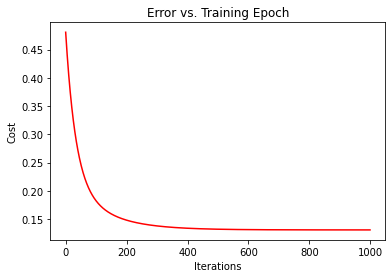

In [15]:
#进行绘图
fig, ax = plt.subplots()    #返回图表以及图表相关的区域，为空代表绘制区域为111--->一行一列图表，选中第一个
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title("Error vs. Training Epoch")
plt.show()

### 5.Fitting plane

将Pandas中的DataFrame转换成Numpy中数组
https://blog.csdn.net/weixin_42263508/article/details/90487483

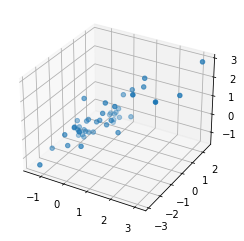

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dv = data.values
m = dv[:,1:2].flatten()
n = dv[:,2:3].flatten()
p = dv[:,3:].flatten()
ax.scatter(m, n, p)
plt.show()

np.arange:https://blog.csdn.net/u011649885/article/details/76851291

numpy.meshgrid()理解:https://blog.csdn.net/lllxxq141592654/article/details/81532855

C:\Users\马嘉文\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


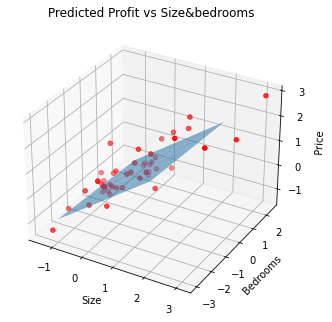

In [50]:
from mpl_toolkits.mplot3d import Axes3D

m, n, p = np.array(data['Size']), np.array(data['Bedrooms']), np.array(data['Price'])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(np.ravel(m), np.ravel(n), np.ravel(p), c = 'red')
a, b = np.meshgrid(np.arange(-1,3), np.arange(-3,3))
p = g[0,0]+(g[0,1]*a)+(g[0,2]*b)
ax.plot_surface(a, b, p, alpha = 0.5)
ax.set_xlabel("Size")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
ax.set_title("Predicted Profit vs Size&bedrooms")
plt.show()

【机器学习】总结：线性回归求解中梯度下降法与最小二乘法的比较:https://justdoit.blog.csdn.net/article/details/103283709?spm=1001.2101.3001.6650.7&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EESLANDING%7Edefault-7-103283709-blog-53508149.pc_relevant_landingrelevant&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EESLANDING%7Edefault-7-103283709-blog-53508149.pc_relevant_landingrelevant&utm_relevant_index=8